# Plot all model performance for comparison

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import datetime

# Import datasets

In [26]:
df = pd.read_csv('results_for_model_comparison.csv')
print(df.shape)
df.head()

(1702, 5)


,Date,Linear,Lasso,Random forest,MLP
0,1993/4/6,-0.000241,-0.000167,0.000003,-1.547512
1,1993/4/7,-0.000002,-0.000153,0.000006,-1.570578
2,1993/4/8,0.000004,-0.000105,0.000026,-1.624673
3,1993/4/12,-0.000005,-0.000104,0.000066,-1.706601
4,1993/4/13,-0.000006,-0.000090,0.000067,-1.732482


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df.head()

,Date,Linear,Lasso,Random forest,MLP
0,1993-04-06,-0.000241,-0.000167,0.000003,-1.547512
1,1993-04-07,-0.000002,-0.000153,0.000006,-1.570578
2,1993-04-08,0.000004,-0.000105,0.000026,-1.624673
3,1993-04-12,-0.000005,-0.000104,0.000066,-1.706601
4,1993-04-13,-0.000006,-0.000090,0.000067,-1.732482


In [29]:
model_name = df.iloc[:,1:].columns.to_list()

# Plot Random Forest 

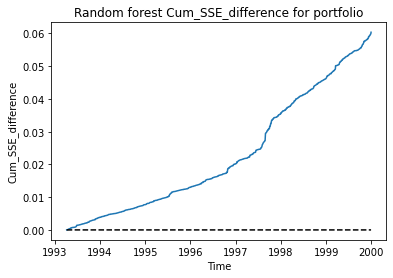

In [25]:
plt.figure()
plt.plot(df['Date'], df['Random forest'])
sup_line = [0 for i in range(df.shape[0])]
plt.plot(df['Date'], sup_line, color='black', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Cum_SSE_difference')
plt.title('Random forest Cum_SSE_difference for portfolio')
plt.show()

# Plot model performance without MLPR

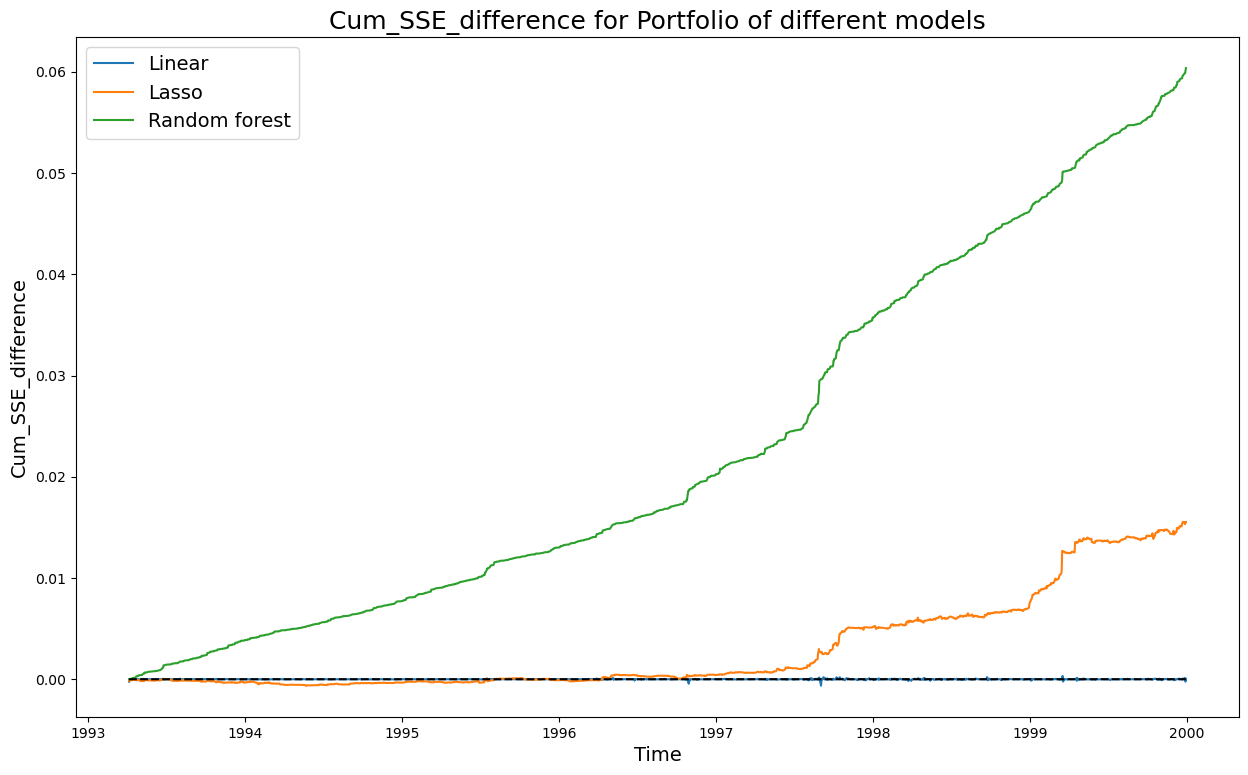

In [31]:
fig = plt.figure(figsize=(15,9), dpi=100)
ax = fig.add_subplot(111)

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

ax.plot(df['Date'], df['Linear'], label='Linear')
ax.plot(df['Date'], df['Lasso'], label='Lasso')
ax.plot(df['Date'], df['Random forest'], label='Random forest')

plt.legend(fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Cum_SSE_difference', fontsize=14)
plt.title('Cum_SSE_difference for Portfolio of different models', fontsize=18)

# add suppliment line
sup_line = [0 for i in range(df.shape[0])]
ax.plot(df['Date'], sup_line, color='black', linestyle='--')

plt.savefig('model_comparison.jpg')
plt.show()

# Plot model performance with MLPR

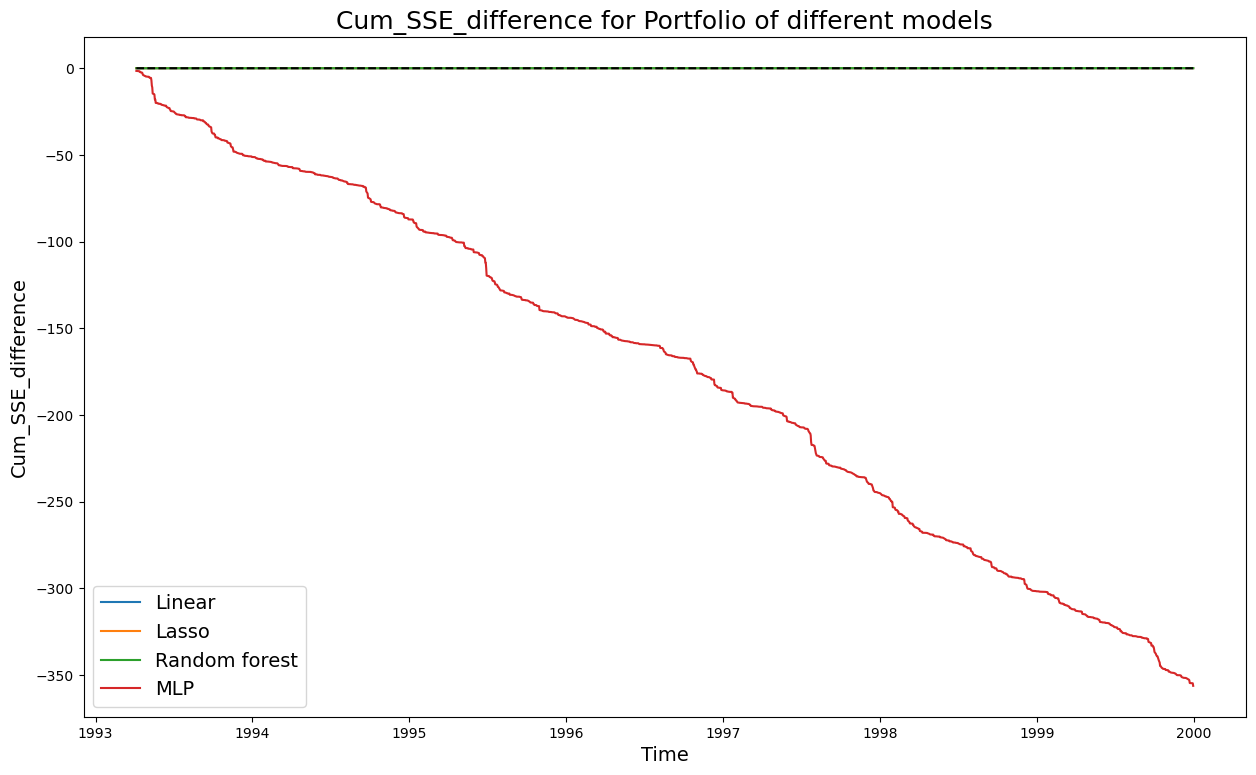

In [32]:
fig = plt.figure(figsize=(15,9), dpi=100)
ax = fig.add_subplot(111)

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))

ax.plot(df['Date'], df['Linear'], label='Linear')
ax.plot(df['Date'], df['Lasso'], label='Lasso')
ax.plot(df['Date'], df['Random forest'], label='Random forest')
ax.plot(df['Date'], df['MLP'], label='MLP')

plt.legend(fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Cum_SSE_difference', fontsize=14)
plt.title('Cum_SSE_difference for Portfolio of different models', fontsize=18)

# add suppliment line
sup_line = [0 for i in range(df.shape[0])]
ax.plot(df['Date'], sup_line, color='black', linestyle='--')

plt.savefig('model_comparison_withMLP.jpg')
plt.show()